In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero

In [3]:
def hermite_pol(n, x):
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return 2*x
    else:
        return 2*x*hermite_pol(n-1, x) - 2*(n-1)*hermite_pol(n-2, x)

In [4]:
def hermite_func(mass, angfreq, n, x):
    hbar = 6.62607004*10**(-34)/(2*np.pi)
    a = (mass*angfreq/(hbar*np.pi))**(1/4.0)
    b = np.sqrt(2**(n)*np.math.factorial(n))
    c = -1/(2.0)*mass*angfreq/hbar
    return a*1/b*hermite_pol(n, x*np.sqrt(mass*angfreq/hbar))*np.exp(c*x**2)

In [5]:
def wavefunc_plot(mass, angfreq, quantnum):
    plt.rc('text', usetex=True)
    
    fig = plt.figure(1, (13, 10))
    ax = fig.add_subplot(SubplotZero(fig, 1,1,1))
    
    ax.axis["xzero"].set_visible(True)
    ax.axis["yzero"].set_visible(True)
    
    for n in ["bottom", "top", "right", "left"]:
        ax.axis[n].set_visible(False)
    
    for n in range(quantnum):
        colors = ["indigo", "crimson", "olive", "darkcyan", "darkslateblue", "purple", "sandybrown", "mediumseagreen"]
        x = np.linspace(-5, 5, 1e3)
        y1 = hermite_func(mass, angfreq, n, x) + 1 + 1.8*n
        y2 = np.ones_like(x) + 1.8*n
        ax.plot(x, y1, label=r"$\Psi_{%d}(x)$"%n, color=colors[n], lw=0.4)
        ax.plot(x, y2, color=colors[n], lw=0.1, alpha=0.3)
        plt.fill_between(x, y1, y2, color=colors[n], alpha=0.5)
    
    y3 = 1.9 * 1/2.0 * x**2
    ax.plot(x, y3, color="teal", lw=0.8)
    
    ax.set_xlim(-4, 4)
    
    
    ax.set_ylim(-0.3, 14.5)
    ax.set_yticks(np.linspace(1, 13.6, 8, endpoint=True))
    #ax.set_yticklabels([r'$E_{%d}$'%i for i in range(quantnum)],rotation=90)
    ax.axis["yzero"].toggle(ticklabels=False)
    ax.axis["xzero"].toggle(ticklabels=False)
    
    #plt.legend(loc=(0.42, 0.08), fontsize=20).get_frame().set_edgecolor('k')
    
    eq1 = r"$\Psi_n(x)=\displaystyle\Bigg(\frac{m\omega}{\pi\hbar}\Bigg)^{\frac{1}{4}}\frac{1}{\sqrt{2^{n}n!}}H_n\Bigg(\sqrt{\frac{m\omega}{\hbar}}x\Bigg)e^{-\frac{1}{2}\frac{m\omega}{\hbar}x^2}$"
    plt.text(-1.8, 15, eq1, {"color": "k", 'fontsize': 18})
    
    plt.text(0.05, 1.05, r"$E_{0}$", {"color": "k", 'fontsize': 19})
    plt.text(3.50, 1.05, r"$\Psi_{0}(x)$", {"color": "k", 'fontsize': 20})
    
    plt.text(0.05, 2.85, r"$E_{1}$", {"color": "k", 'fontsize': 19})
    plt.text(3.50, 2.85, r"$\Psi_{1}(x)$", {"color": "k", 'fontsize': 20})
    
    plt.text(0.05, 4.65, r"$E_{2}$", {"color": "k", 'fontsize': 19})
    plt.text(3.50, 4.65, r"$\Psi_{2}(x)$", {"color": "k", 'fontsize': 20})
    
    plt.text(0.05, 6.45, r"$E_{3}$", {"color": "k", 'fontsize': 19})
    plt.text(3.50, 6.45, r"$\Psi_{3}(x)$", {"color": "k", 'fontsize': 20})
    
    plt.text(0.05, 8.25, r"$E_{4}$", {"color": "k", 'fontsize': 19})
    plt.text(3.50, 8.25, r"$\Psi_{4}(x)$", {"color": "k", 'fontsize': 20})
    
    plt.text(0.05, 10.05, r"$E_{5}$", {"color": "k", 'fontsize': 19})
    plt.text(3.50, 10.05, r"$\Psi_{5}(x)$", {"color": "k", 'fontsize': 20})
    
    plt.text(0.05, 11.85, r"$E_{6}$", {"color": "k", 'fontsize': 19})
    plt.text(3.50, 11.85, r"$\Psi_{6}(x)$", {"color": "k", 'fontsize': 20})
    
    plt.text(0.05, 13.65, r"$E_{7}$", {"color": "k", 'fontsize': 19})
    plt.text(3.50, 13.65, r"$\Psi_{7}(x)$", {"color": "k", 'fontsize': 20})
    
    
    
    
    plt.show()
    #fig.savefig("Harmonischer-Oszillator.pdf", bbox_inches="tight")

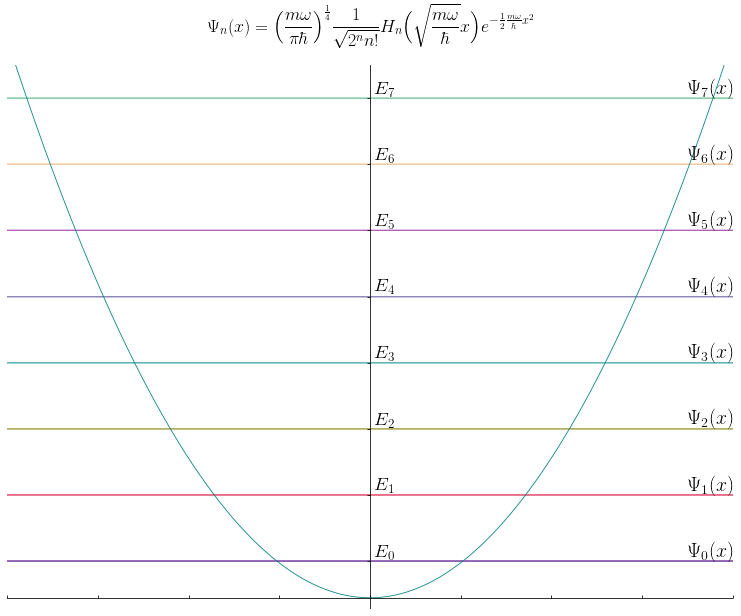

None


In [6]:
print(wavefunc_plot(1.6726*10**(-27),6.546*10**(12),8))